## 因子分析をやってみよう
知能検査のデータを使って因子分析に挑戦してみましょう．\
データセットは，1939年にHolzingerとSwinefordによる研究で収集されたものを用います．\
Rのライブラリから利用できるようになっていますが，今回はPythonで扱うために，あらかじめcsvファイルに変換してあります．
詳細は[こちら](https://rdrr.io/cran/lavaan/man/HolzingerSwineford1939.html)をご覧ください．

まずは大まかな流れを確認しておきます．
- データを読み込み，整形する
- 因子の数を決定する
- 因子分析ライブラリにデータを突っ込む
- 因子を回転しつつ，因子負荷量の解釈を行う

これだけです．簡単ですね！

まずは，pandasを用いてデータを読み込み，中身を確認してみましょう！

In [2]:
import pandas as pd

df = pd.read_csv("HolzingerSwineford1939.csv")

In [3]:
df.head(5)

,id,sex,ageyr,agemo,school,grade,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,1,1,13,1,Pasteur,7.0,3.333333,7.75,0.375,2.333333,5.75,1.285714,3.391304,5.75,6.361111
1,2,2,13,7,Pasteur,7.0,5.333333,5.25,2.125,1.666667,3.00,1.285714,3.782609,6.25,7.916667
2,3,2,13,1,Pasteur,7.0,4.500000,5.25,1.875,1.000000,1.75,0.428571,3.260870,3.90,4.416667
3,4,1,13,2,Pasteur,7.0,5.333333,7.75,3.000,2.666667,4.50,2.428571,3.000000,5.30,4.861111
4,5,2,12,2,Pasteur,7.0,4.833333,4.75,0.875,2.666667,4.00,2.571429,3.695652,6.30,5.916667


x1~x9の内容を説明

In [4]:
# x1~x9のみを取り出す．
df_x = df.iloc[:, 6:16]

### 因子数の決定
因子分析における因子数は，あらかじめ決めておく必要があります．\
ここでは，カイザー基準とスクリープロットを用いて検討してみましょう．\
- カイザー基準
    - hoge
- スクリープロット
    - hoge

因子分析を行うにあたっては，相関行列を計算しておく必要があります．\
pandasのデータフレームの形式であれば，corr()を使うと簡単に算出できます．\
特に引数を指定しない場合はピアソンの相関係数が使われますが，\
井上先生がおすすめしていたスピアマンの相関係数を使いたい場合は，corr(method="spearman")としましょう．

In [9]:
cor_m = df_x.corr()

In [11]:
import numpy as np
val_vec = np.linalg.eig(cor_m)
val_vec

(array([3.21634418, 1.63871322, 1.36515935, 0.69891845, 0.23772565,
        0.28600236, 0.58434753, 0.47310206, 0.4996872 ]),
 array([[ 0.36706578,  0.09836417, -0.31741655,  0.44346781,  0.12541265,
         -0.06816112,  0.28063873,  0.41949031, -0.53203924],
        [ 0.21728651,  0.06774635, -0.53175502, -0.78635458,  0.01134744,
          0.01092283, -0.04062703,  0.21043142, -0.0300012 ],
        [ 0.26599538,  0.25741149, -0.46438922,  0.34550245,  0.08409719,
          0.10614718, -0.58897522, -0.33077008,  0.23090317],
        [ 0.42701268, -0.3487677 ,  0.14497289,  0.03542534, -0.59105744,
          0.53456676, -0.11833347,  0.15493873,  0.02509644],
        [ 0.41125081, -0.37782422,  0.18564799, -0.08547348,  0.72905982,
          0.25567059,  0.10686568, -0.17218208,  0.0915867 ],
        [ 0.43055396, -0.33496868,  0.0972171 , -0.03277768, -0.19881622,
         -0.77794856, -0.11385305, -0.18490224, -0.00324402],
        [ 0.19448711,  0.39118693,  0.50586387, -0.0884477

In [19]:
eigen_values = val_vec[0] #固有値のリスト
sorted_eigen_values = np.sort(eigen_values)[::-1]

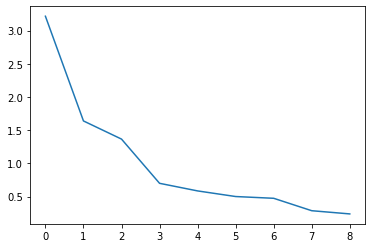

In [20]:
import matplotlib.pyplot as plt

plt.plot(sorted_eigen_values)

カイザー基準で考える場合，1以上の固有値の数を因子数とするので，3となります．\
固有値を大きい順に並び替えて描いたスクリープロットで考える場合，グラフが大きく折れ曲がる直前までの個数を因子数とするので，やはり3となります．

### 因子数を3として因子分析を実行

In [45]:
# sklearnの標準化モジュールをインポート
from sklearn.preprocessing import StandardScaler

# データを変換する計算式を生成
sc = StandardScaler()
sc.fit(df_x)

# 実際にデータを変換
z = sc.transform(df_x)

In [60]:
from sklearn.decomposition import FactorAnalysis as FA

n_components = 3 # 因子数

fa = FA(n_components) # モデルを定義
fitted = fa.fit_transform(z)

In [61]:
fa.components_.T

array([[ 0.48905793,  0.31206221,  0.38894571],
       [ 0.24497892,  0.17213962,  0.40257465],
       [ 0.27347104,  0.40486991,  0.46524589],
       [ 0.83519451, -0.1546602 , -0.03376719],
       [ 0.83705238, -0.20884085, -0.09719254],
       [ 0.82369382, -0.13052555,  0.01461763],
       [ 0.22946333,  0.4846071 , -0.45881603],
       [ 0.27007449,  0.62154953, -0.2669453 ],
       [ 0.37710141,  0.56130213,  0.02518649]])

### バリマックス回転
回転しても，共通性，独自性などが変化するわけではない．

In [54]:
fa = FA(n_components, rotation="varimax") # モデルを定義
fitted = fa.fit_transform(z)

In [56]:
factor_loadings = fa.components_.T # 因子負荷量
factor_loadings

array([[ 0.32058088,  0.12992203,  0.60678449],
       [ 0.13527093, -0.04116538,  0.4813733 ],
       [ 0.08019412,  0.11339432,  0.66020484],
       [ 0.83913806,  0.07654972,  0.11223784],
       [ 0.86468545,  0.07031466,  0.03305309],
       [ 0.81576618,  0.06552075,  0.16110455],
       [ 0.10252039,  0.69536513, -0.06298024],
       [ 0.07749664,  0.70282739,  0.17479066],
       [ 0.16942275,  0.51113577,  0.40980004]])

3

## 因子の解釈